# Topic 3 Lecture - Introduction to Computer Vision and Machine Learning

## Aims of the Session

* Learn the basics on how images are imported to our computers and converted into data

## Resources for the Lecture

* Introduction to Computing and Programming in Python: A Multimedia Approach. Mark Guzdial, Barbara Ericson. Pearson, 2016.
* Various others mentioned throughout the lecture!

## How does an image look *digitally*?

* These are the main **compression algorithms** used to store images:

![Fig. 1. Image extensions](https://www.dropbox.com/s/4an7wf2na3fvgvf/comp.jpg?raw=1)

### Compression Algorithms

* The *art* of compression algorithms is in **quantisation**!

* Best algorithms are the ones that achieve best visual quality with reduced size.

![Fig. 2. Quantization](https://www.dropbox.com/s/714a6l2o7ln6ukw/quant.jpg?raw=1)

* The importance of compression

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/NMkZpuiEqh8" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

* Fortunately, this is **NOT** our problem in this module!

* We are going to work with images in *simpler* ways

## Images as arrays/matrices

* Using the `numpy` module

* Complementing by using the `OpenCV`module, which will let us import and manipulate images

* When we import an image, the first thing we will get is a **bitmap**

![Fig. 3. Bitmap](https://www.dropbox.com/s/zinj0mv5uzu9eb1/pix.jpg?raw=1)

* Each pixel will be represented as a value within an $n \times m$ matrix

### Grayscale Images

* A 2D grid of pixels

* Two ways to represent them:

1. Standard: from 0 (black) to 255 (white) with 254 gray values in between.

![Fig. 4. Standard grayscale image](https://www.dropbox.com/s/mk70ili2yyb9con/graystan.jpg?raw=1)

2. Normalised: from 0 (black) to 1 (white) with "infinite" gray values in between.

![Fig. 5. Normalised grayscale image](https://www.dropbox.com/s/qrt5j974q2adu9m/graynorm.jpg?raw=1)

**IS IT POSSIBLE TO CONVERT BETWEEN STANDARD $\leftrightarrow$ NORMALISED?**

### Colour Images

![Fig. 6. "Pixelated" colour image](https://www.dropbox.com/s/4rbrymh3dobhyi9/smile.jpg?raw=1)

* Each pixel has three `channels`: $\color{red}{red}$, $\color{green}{green}$ and $\color{blue}{blue}$

* Images with colour are often called $\color{red}{R}$$\color{green}{G}$$\color{blue}{B}$ images

#### Option 1

* If a colour image is imported, a matrix will be produced, this time with three values per pixel instead of one

* The three values will be stored in a tuple

![Fig. 7. RGB image, option 1](https://www.dropbox.com/s/ohrcjtln8mvpa49/rgb.jpg?raw=1)

#### Option 2

* When importing a colour image in `OpenCV`, a 3D array will be produced, with the third dimension representing the three channels

![Fig. 8. RGB image, option 2](https://www.dropbox.com/s/5eytedi8kqb01er/rgb2.jpg?raw=1)

* Advantage of option 2: Faster to do calculations and transformations

**HOW MANY COLOURS CAN BE REPRESENTED USING THIS STANDARD?**

**CAN RGB BE NORMALISED?**

**ARE THERE ANY OTHER STANDARDS THAT CAN REPRESENT MORE COLOURS?**

## Machine Learning

* Machine learning: An automatic function that maps $x \rightarrow y$ based on the input data

![Fig. 9. Fundamentals of Machine Learning](https://www.dropbox.com/s/shrjabuib4m7nf5/ml.jpg?raw=1)

### Types of Machine Learning

#### Supervised Learning

* Aims to learn a function that, given a sample of data and desired outputs, approximates a function that maps inputs to output

* Done in the context of **classification** (when mapping input to output label) or **regression** (when mapping input to continuous output)

* The "correct" output will be deduced from the `training` data, therefore the model requires a reliable base

##### Examples of Supervised Learning Algorithms

###### Regression

* The simplest ML out there! A line (or curve) that adapts to the data points and tries to do a prediction based on the existing data and how it adapts to a mathematical function

![Fig. 10. Linear Regression](https://www.dropbox.com/scl/fi/f2988tk32wb5vpecgk4bu/lr.png?rlkey=3qzrrifvdiimzqcd1iudnyvhv&raw=1)[Source](https://realpython.com/linear-regression-in-python/)

* There's a version called logistic regression which uses a probability curve, which in turn can be adapted for binary classification!

![Fig. 11. Logistic Regression](https://www.dropbox.com/scl/fi/sfjlsxrruvus2vboiezzh/logr.png?rlkey=6wzansi3caaqb8gd362uhzep7&raw=1)[Source](https://www.natasshaselvaraj.com/logistic-regression-explained-in-7-minutes/)

* Also very simple code to implement

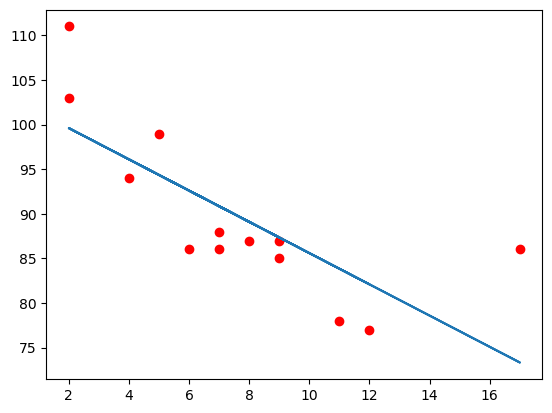

In [2]:
# Source: https://www.w3schools.com/python/python_ml_linear_regression.asp

import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

# This is the lin reg, one line of code!
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y, color='red')
plt.plot(x, mymodel)
plt.show() 

###### K Nearest Neighbours

* Classify by a majority vote of neighbours

* Advantages: Simple to implement, robust to noisy training data, and effective if training data is large

* Disadvantages: Need to determine the value of K computation cost is high

![Fig. 12. KNN](https://www.dropbox.com/scl/fi/s6thzhm8tiyiuu4vi8edt/knn.png?rlkey=9z16d09jjumei8atwjta4p1ep&raw=1)

It's like playing darts/curling. Your training data are the stars and triangles, and your test data are the ?. Every time a new data point comes it gets thrown to the board and it gets classified according to the neighbours. The problem is the disparity you have with different k values. Use it when there's not much to "learn" from your data!

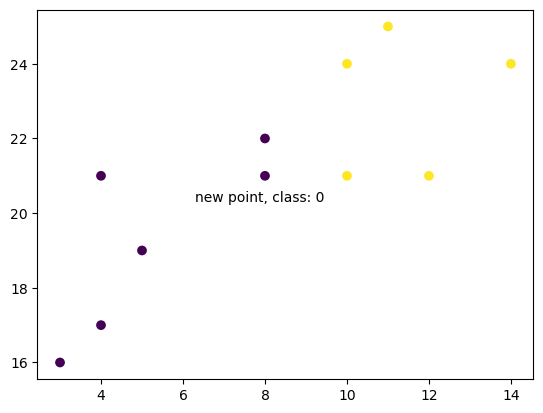

In [3]:
# Source: https://www.w3schools.com/python/python_ml_knn.asp

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
data = list(zip(x, y))

# Two lines of code to declare and "fit" the model!
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes) 

# Test it
new_x = 8
new_y = 21

new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

###### Decision Tree/Random Forest

* Segment the predictor space into multiple regions

* Each region has only a subset of the training dataset

* High variance $\rightarrow$ Small changes in the training data can give an entirely different decision tree model

![Fig. 13. Decision Tree](https://www.dropbox.com/scl/fi/681vx0ksis80zfbklc2fq/dn.jpg?rlkey=7813zye213svr0f6lwdjz80nc&raw=1)

The key aspect is that a person can be fit under 30 and not eating lots of pizza OR over 30 and excercising in the morning (two different sets of people). When you need multiple iterations or attempts, you create various trees which in turn generate a Random Forest!

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

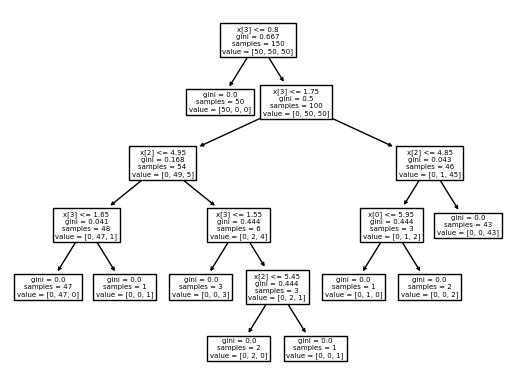

In [4]:
# Source: https://scikit-learn.org/stable/modules/tree.html

from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X, y = iris.data, iris.target

## Again, classifier is just two lines of code
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# You can even visualise the tree
tree.plot_tree(clf)

###### Naive Bayes

* Probabilistic classifier inspired by the Bayes theorem, assumes attributes are conditionally independent

* Advantages: small amount of training data required, extremely fast

* Disadvantages: zero probability problem, if the conditional probability is zero for a particular attribute...

![Fig. 14. NB](https://www.dropbox.com/scl/fi/83t7ybqo9w5emn6jgvx26/nb.png?rlkey=g54otgerssy98hg30y3qd6h49&raw=1)

In [5]:
# Credit: https://www.kaggle.com/code/nizamudma/iris-data-classification-using-naive-bayes

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#split data for train and test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

# No surpise, two lines
bc=GaussianNB()
bc.fit(x_train,y_train)

# Predict samples from the text set
print(bc.predict(x_test))

[0 1 2 1 1 0 0 2 0 2 0 0 0 2 1 1 1 0 0 2 2 0 0]


###### Support Vector Machine (SVM)

* Discriminative classifier defined by a separating hyperplane

* Tuning parameters in SVM classifier
    * Kernel - transformation method, e.g. Polynomial and exponential kernels
    * Regularisation - how much to avoid misclassifying each training example
    * Gamma - how far the influence of a single training example reaches, high gamma → only nearby examples

* A margin in SVM is a separation of line to the closest class points
    * A good margin is one where this separation is larger for both the classes

![Fig. 15. SVM](https://www.dropbox.com/scl/fi/risnrcss13j0qyb5w84si/svm.png?rlkey=9uxvubuwiptvqaoymr8nm2ohc&raw=1)

* We will do this one in Lab Topic 5! But trust me, again it is two lines of code...

###### Neural Network (NN)

We will talk **EXTENSIVELY** about them later on

![Fig. 16. NN](https://www.dropbox.com/scl/fi/kq536qoo6xoqkvl8exuy3/nn.png?rlkey=s4tx5gzg74xbqajhscddoqi1r&raw=1)

![Fig. 17. Tradeoff](https://www.dropbox.com/scl/fi/0i0i56m9euztqwl2wikdf/accvsinter.png?rlkey=vbjwev6t1228cebp59dara3gd&raw=1)

#### Semi-supervised Learning

* Aims to label unlabelled data points using knowledge learned from a small number of labelled data points

* Learning with both unlabelled and labeled data points

* Used when large amounts of data are costly to label

##### Assumptions of Semi-supervised Learning

* `Continuity`: Data points that are "close" have a common label

* `Cluster`: Data naturally forms discrete clusters, most common to share label

* `Manifold`: Data lies in a lower dimensional space than the input space

##### Examples of Semi-supervised Learning Algorithms

###### Transductive SVM

###### Label Propagation

#### Unsupervised Learning

* Does not have (or need) any labelled outputs, so its goal is to infer the natural structure present within a set of data points

* Finds inherent patterns of data

* Most common tasks: **clustering** and **exploratory data analysis**

##### Examples of Unsupervised Learning Algorithms

###### K-means Clustering

###### Principal Component Analysis (PCA)

###### Autoencoders

### A simpler explanation of what I just said

In [6]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/R9OHn5ZF4Uo" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

As you can see, we can do more things beyond classification, such as **detecting** where the object lies in the image, **recognise** it from a pool of similar objects, **segment** where it is or even **track** it in a video feed!

# LAB 3: IMPORTING AND MANIPULATING IMAGES IN PYTHON